In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
train_raw = pd.read_csv("../data-raw/churn-bigml-80.csv")
test_raw = pd.read_csv("../data-raw/churn-bigml-20.csv")

In [3]:
df = pd.concat([train_raw, test_raw], ignore_index=True)
print(f"\nTotal: {df.shape}")


Total: (3333, 20)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Churn'] = df['Churn'].astype(int)


Tingkat churn: 14.49% (483 dari 3333)


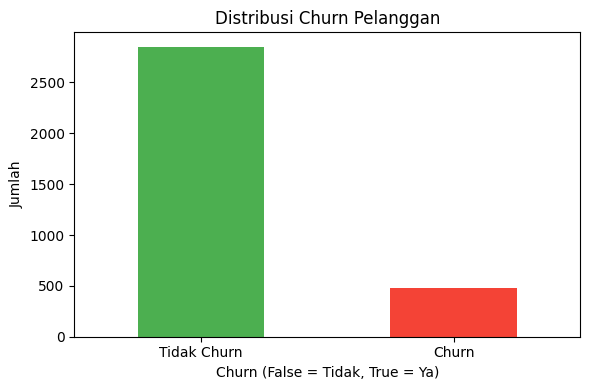

In [9]:
churn_rate = df['Churn'].mean()
print(f"\nTingkat churn: {churn_rate:.2%} ({df['Churn'].sum()} dari {len(df)})")

plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Distribusi Churn Pelanggan')
plt.xlabel('Churn (False = Tidak, True = Ya)')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Tidak Churn', 'Churn'], rotation=0)
plt.tight_layout()
plt.show()

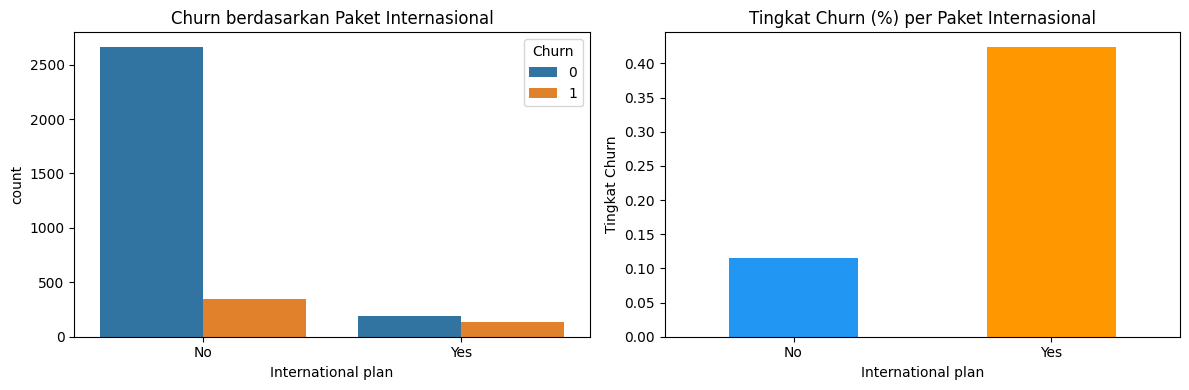

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='International plan', hue='Churn')
plt.title('Churn berdasarkan Paket Internasional')

plt.subplot(1, 2, 2)
churn_by_intl = df.groupby('International plan')['Churn'].mean()
churn_by_intl.plot(kind='bar', color=['#2196F3', '#FF9800'])
plt.title('Tingkat Churn (%) per Paket Internasional')
plt.ylabel('Tingkat Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

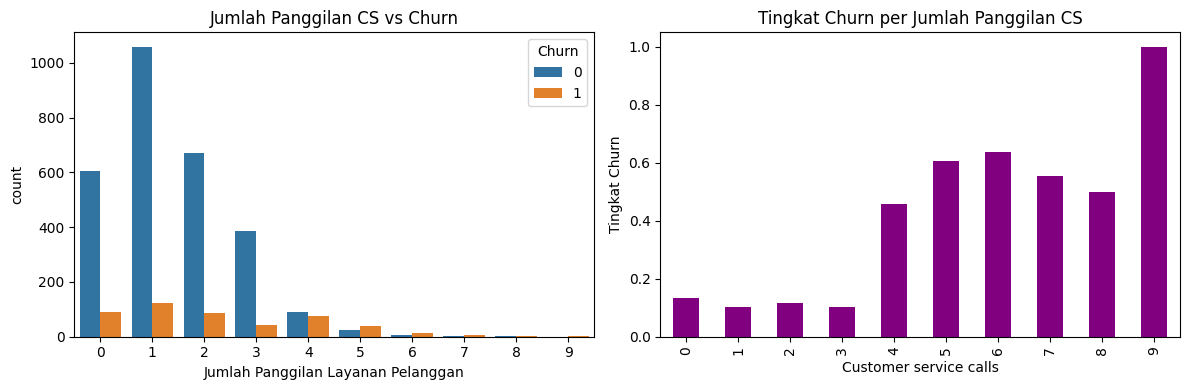

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Customer service calls', hue='Churn')
plt.title('Jumlah Panggilan CS vs Churn')
plt.xlabel('Jumlah Panggilan Layanan Pelanggan')

plt.subplot(1, 2, 2)
churn_by_csc = df.groupby('Customer service calls')['Churn'].mean()
churn_by_csc.plot(kind='bar', color='purple')
plt.title('Tingkat Churn per Jumlah Panggilan CS')
plt.ylabel('Tingkat Churn')
plt.tight_layout()
plt.show()

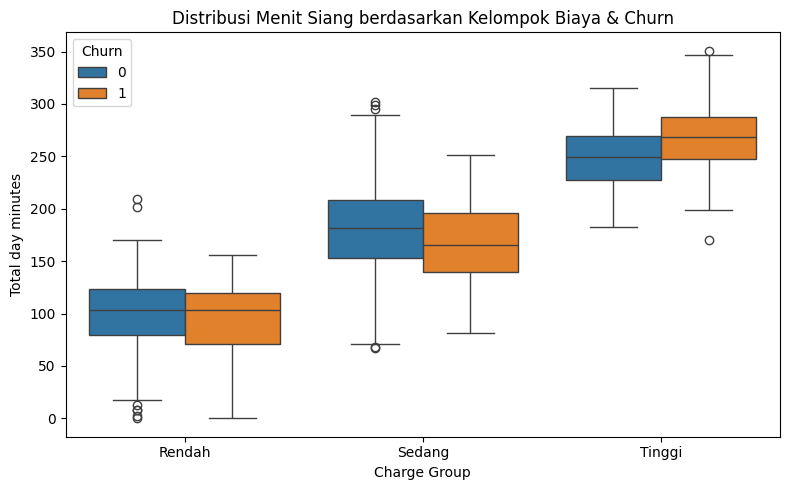

In [12]:
df['Charge Group'] = pd.cut(df['Total day charge'] + df['Total eve charge'] + 
                             df['Total night charge'] + df['Total intl charge'],
                             bins=3, labels=['Rendah', 'Sedang', 'Tinggi'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Charge Group', y='Total day minutes', hue='Churn')
plt.title('Distribusi Menit Siang berdasarkan Kelompok Biaya & Churn')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Korelasi fitur numerik dengan Churn (teratas):
Churn                     1.000000
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Name: Churn, dtype: float64

Korelasi terendah:
Total eve calls          0.009233
Area code                0.006174
Total night calls        0.006141
Total intl calls        -0.052844
Number vmail messages   -0.089728
Name: Churn, dtype: float64


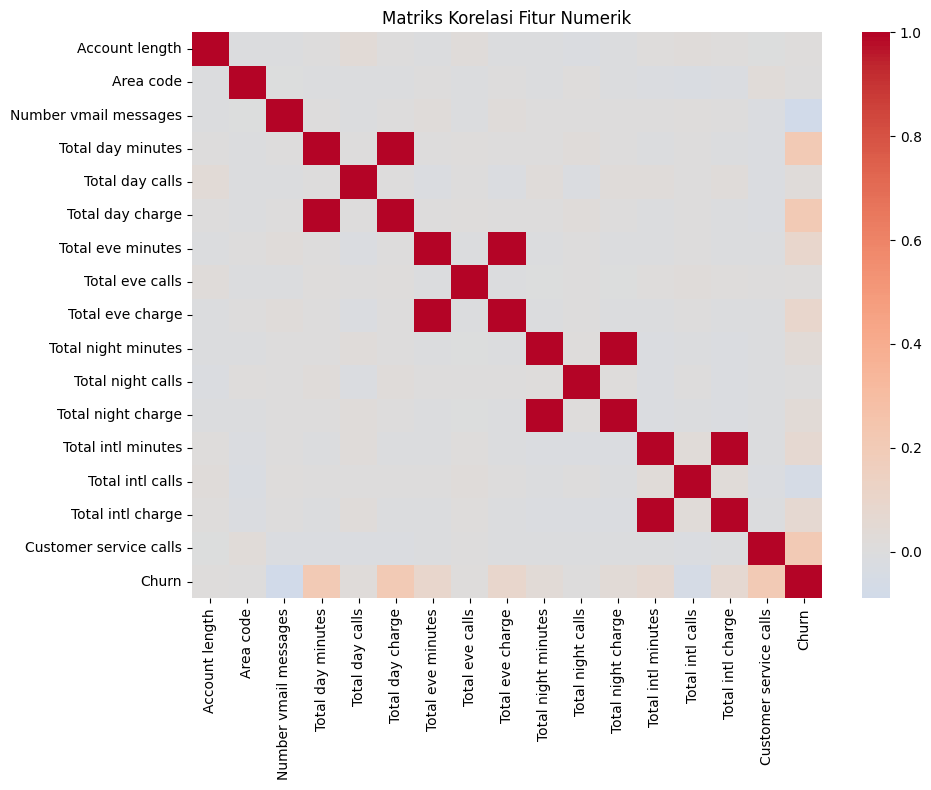

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_with_churn = df[numeric_cols].corr()['Churn'].sort_values(ascending=False)
print("\nKorelasi fitur numerik dengan Churn (teratas):")
print(corr_with_churn.head(5))
print("\nKorelasi terendah:")
print(corr_with_churn.tail(5))

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

## preprocessing

In [14]:
train = train_raw.copy()
test = test_raw.copy()

In [15]:
for df_processed in [train, test]:
    df_processed['Churn'] = df['Churn'].astype(int)
    df_processed['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
    df_processed['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [16]:
def add_feature(df_processed):
    df_processed['Total minutes'] = (
        df_processed['Total day minutes'] +
        df_processed['Total eve minutes'] +
        df_processed['Total night minutes'] +
        df_processed['Total intl minutes']
    )

    df_processed['Total calls'] = (
        df_processed['Total day calls'] +
        df_processed['Total eve calls'] +
        df_processed['Total night calls'] +
        df_processed['Total intl calls']
    )

    df_processed['Total charge'] = (
        df_processed['Total day charge'] +
        df_processed['Total eve charge'] +
        df_processed['Total night charge'] +
        df_processed['Total intl charge']
    )

    df_processed['High CSR calls'] = (df_processed['Customer service calls'] > 3).astype(int)
    df_processed['Call frequency'] = df_processed['Total calls'] / df_processed['Account length']
    return df_processed

train = add_feature(train)
test = add_feature(test)

In [17]:
train = train.drop(columns=['State'])
test = test.drop(columns=['State'])

In [18]:
scaler = StandardScaler()
numeric_cols = [
    'Account length', 'Number vmail messages', 'Total minutes', 'Total calls',
    'Total charge', 'Customer service calls', 'Call frequency'
]
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

In [19]:
charge_75 = np.percentile(train['Total charge'], 75)
day_minutes_75 = np.percentile(train['Total day minutes'], 75)

train['Charge Group'] = (train['Total charge'] > charge_75).astype(int)
test['Charge Group'] = (test['Total charge'] > charge_75).astype(int)
train['Day usage high'] = (train['Total day minutes'] > day_minutes_75).astype(int)
test['Day usage high'] = (test['Total day minutes'] > day_minutes_75).astype(int)

In [20]:
cols_to_drop = [
    'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes',
    'Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls',
    'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge',
    'Total charge'
]
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [21]:
train.to_csv("train_preprocessed.csv", index=False)
test.to_csv("test_preprocessed.csv", index=False)